# Task 12. Homework 2

Predict a grape sort using chemichal analysis of wine. Employ KNN - k nearest neighbors method with 3 different metrics. Plot the relation of the error to the number of neighbors. 


In [79]:
import numpy as np
import pandas as pd
import urllib
# url with dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# download the file
raw_data = urllib.urlopen(url)
# load the CSV file as a numpy matrix
dataset = np.loadtxt(raw_data, delimiter=",")

column_names = ['Sort','Alcohol','Malic acid','Ash','Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
dataset = pd.DataFrame(dataset, columns = column_names)

# identify X and y as a matrix of features and answers, respectively

X = dataset.drop(columns = 'Sort')
y = dataset['Sort']

In order to get the most accurate results, all data has to be normalized

In [80]:
from sklearn import preprocessing
# standardize the data attributes
X = preprocessing.scale(X)

Here we create subsets for cross-validation

In [81]:
from sklearn.model_selection import KFold
folding = KFold(n_splits=5, shuffle=True)

Learning process and accuracy calculations using cross-validation method

In [82]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

metrics_names = ['euclidean','chebyshev','manhattan']
metrics_errors = [[],[],[]]

for i in range (len(metrics_names)):
    for k_neighbors in range(1,len(X_train)):
        
        # initialize and learn the classifier
        
        classifier = KNeighborsClassifier(n_neighbors = k_neighbors, metric = metrics_names[i])
        classifier.fit(X,y)
        
        # here we use cross-validation to measure the accuracy of the classifier
        
        accuracy = cross_val_score(classifier, X, y, scoring='accuracy', cv = folding)
        accuracy = accuracy.mean()
        
        metrics_errors[i].append(1 - accuracy)                  

Plotting the relation of error to number of neighbors

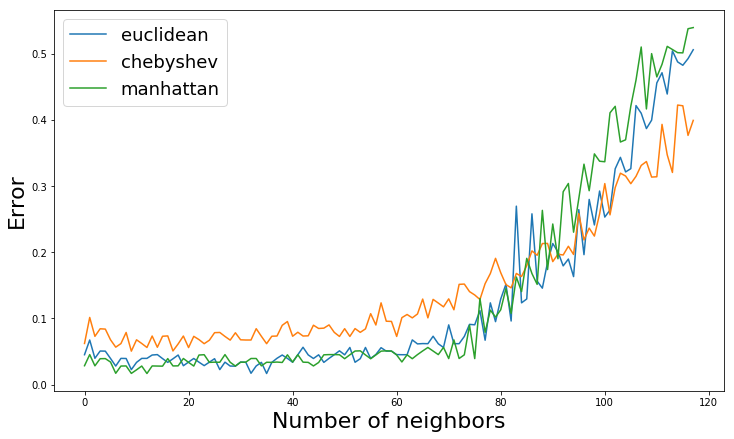

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.xlabel('Number of neighbors', fontsize=22)
plt.ylabel('Error', fontsize=22)

for i in range(len(metrics_names)):
    plt.plot(metrics_errors[i], label=metrics_names[i])
    
plt.legend(fontsize=18)    
plt.savefig(fname='Problem12_hw2.png',format='png')

# Task 12. Homework 3

Find the relation between standart errors and the number of objects in the training set

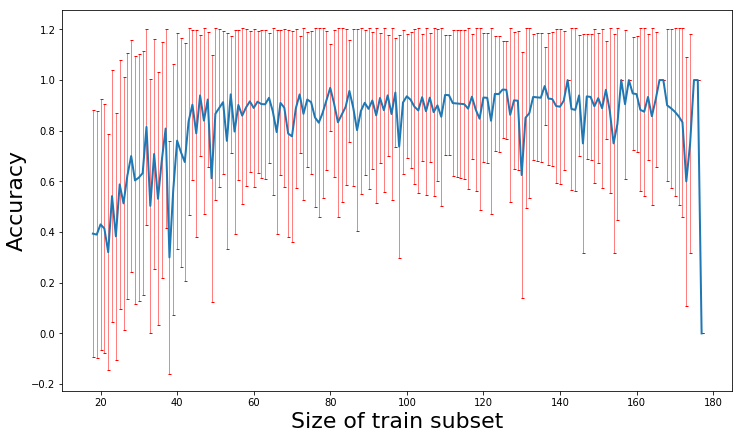

In [84]:
number_of_neighbors = 18
number_of_subjects = len(X)

avg = []
std = []

for i in range(number_of_neighbors, number_of_subjects):
    subset = dataset.sample(n=i)
    answers = subset['Sort']
    qualities = subset.drop(columns = 'Sort')    
    qualities = preprocessing.scale(qualities)
    test = pd.concat([dataset, subset,subset]).drop_duplicates (keep = False)
    test_answers = test['Sort']
    test_qualities = test.drop(columns = 'Sort')
    test_qualities = preprocessing.scale(test_qualities)
    
    classifier = KNeighborsClassifier(n_neighbors = number_of_neighbors, metric = 'chebyshev')
    classifier.fit(qualities, answers)
    
    prediction = classifier.predict(test_qualities)
    avg.append(np.mean(prediction == test_answers))
    std.append(np.std(prediction == test_answers))
    
    
plt.figure(figsize=(12,7))
plt.xlabel('Size of train subset', fontsize=22)
plt.ylabel('Accuracy', fontsize=22)

plt.errorbar(list(range(number_of_neighbors, number_of_subjects)), avg,
             yerr=std, linewidth=2, elinewidth=0.5, ecolor='red', capsize=1.5)
plt.savefig(fname='Problem12_hw3.png',format='png')
